In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [16]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data: ", x_train.shape, y_train.shape)
print("Testing data: ", x_test.shape, y_test.shape)

Training data:  (60000, 28, 28) (60000,)
Testing data:  (10000, 28, 28) (10000,)


In [3]:
classes = ['t-shirt', 'trousers', 'sweater', 'dress', 'coat', 'shoes', 'blouse', 'training shoes', 'bag', 'boots']

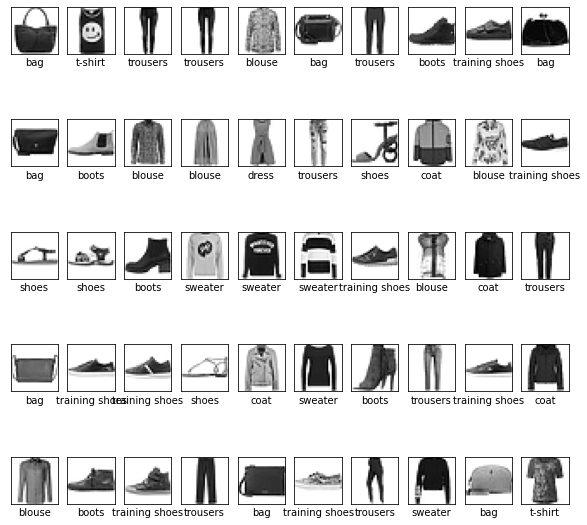

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

### Reshape the data to one dense:

In [22]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

### Normalisation

In [23]:
x_train = x_train / 255 
x_test = x_test / 255 

In [24]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### One hot encoding

In [17]:
y_train = utils.to_categorical(y_train, 10)

In [18]:
y_test = utils.to_categorical(y_test, 10)

In [19]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Implement Classifier

In [56]:
model = Sequential()
model.add(Dense(1200, input_dim=784, activation="relu"))
# as we have 10 classes
model.add(Dense(10, activation="softmax"))

In [57]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1200)              942000    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                12010     
Total params: 954,010
Trainable params: 954,010
Non-trainable params: 0
_________________________________________________________________
None


## Teach the Neural Network

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

In [66]:
model.save('drive/My Drive/Course3/segmentation/models/fashion_mnist_dense.h5')

## Scores of the model

In [67]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8677


In [68]:
print("Accuracy:", round(scores[1] * 100, 4))

Accuracy: 86.77


## Prediction

In [69]:
n_rec = 496

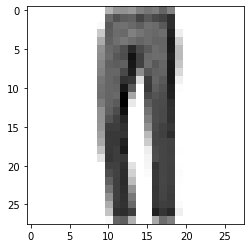

In [70]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

#### Make manual augmentation

In [71]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

In [72]:
prediction = model.predict(x)

In [73]:
prediction

array([[5.67850948e-05, 9.99819696e-01, 4.89896138e-06, 1.05663545e-04,
        7.65062123e-06, 6.84620627e-09, 5.17553133e-07, 2.78062743e-07,
        4.49415120e-06, 5.97339556e-09]], dtype=float32)

In [74]:
prediction = np.argmax(prediction[0])
print("Class Id:", prediction)
print("Class name:", classes[prediction])


Class Id: 1
Class name: trousers


In [75]:
label = np.argmax(y_test[n_rec])
print("Class Id:", label)
print("Class Name:", classes[label])

Class Id: 1
Class Name: trousers


### Try to upload your photo

In [76]:
files.upload()

Saving trousers.jpg to trousers (1).jpg


{'trousers.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTR

In [77]:
# Check if the image was uploaded
!ls

 drive	 sample_data  'trousers (1).jpg'   trousers.jpg


In [78]:
img_path = 'trousers.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

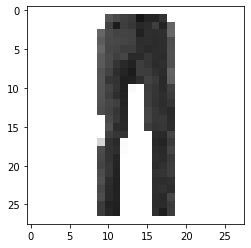

In [79]:
plt.imshow(img.convert('RGBA'))
plt.show()

### Prepare image for prediction

In [80]:
x = image.img_to_array(img)
x = x.reshape(1, 784)
x = 255 - x
x /= 255

### Predict

In [81]:
prediction = model.predict(x)

In [82]:
prediction

array([[4.7934006e-04, 9.9869907e-01, 5.4531014e-05, 5.8563275e-04,
        1.5023879e-04, 2.7735473e-08, 3.8827302e-06, 5.5544314e-07,
        2.6789741e-05, 8.6861185e-09]], dtype=float32)

In [83]:
prediction = np.argmax(prediction)
print("Class Id:", prediction)
print("Class Name:", classes[prediction])

Class Id: 1
Class Name: trousers
